<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data/blob/main/The_New_York_Times_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [607]:
print('Welcome to New York Times Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
print('After the github is cloned, please delete the cell below or # it out if you are going to run the notebook again')
userinput = input('Please put state here:')

Welcome to New York Times Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
After the github is cloned, please delete the cell below or # it out if you are going to run the notebook again
Please put state here:California


**Framework for Cases and Deaths from The COVID-19 Tracking Project**

In [608]:
# run this once and then # it out or delete

#! git clone https://github.com/nytimes/covid-19-data.git

In [609]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [610]:
# ignore this 
data = { 'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }

In [611]:
import pandas as pd
import matplotlib.pyplot as plt

In [612]:
# reading in the data
df = pd.read_csv('/content/covid-19-data/us-states.csv')

In [613]:
# cleaning data
df = df.drop(columns = 'fips')

In [614]:
# converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [615]:
# making sure the date starts after 03-01
df = df[df['date'] >= '03-01-2020']

In [616]:
# making creating the day column
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [617]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [618]:
# setting the state to the users input
df = df[df['state'] == userinput]

In [619]:
# cleaning data
df = df.reset_index(drop = True)

In [620]:
# making sure it only calculate where the deaths >0
df = df[(df['deaths'] > 0) & (df['cases']>0)]

In [621]:
# setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [622]:
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [623]:
# creating the CDF Column
df['cdf_cases'] = df['cases']

In [624]:
# creating the cdf column
df['cdf_deaths'] = df['deaths']

In [625]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [626]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [627]:
# cleaning data
df= df.drop(columns = ['index'])

In [628]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'cases'] - df.loc[i-1, 'cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [629]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'deaths'] - df.loc[i-1, 'deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [630]:
# difference of avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [631]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [632]:
# avg day of death/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

**Framework hospital data**

In [633]:
# loading in the data

hospitalizationdf = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD')

In [634]:
# slicing the df
hospitalizationdf = hospitalizationdf.loc[:,['state','date','previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected']]

In [635]:
# setting the state through user input
hospitalizationdf = hospitalizationdf[hospitalizationdf.state == data[userinput]]

In [636]:
# setting to datetime 
hospitalizationdf.date = pd.to_datetime(hospitalizationdf.date)

In [637]:
# sorting the data
hospitalizationdf = hospitalizationdf.sort_values(by = 'date')

In [638]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [639]:
# starting the date at 03-01-2020
hospitalizationdf = hospitalizationdf[hospitalizationdf['date'] >= '03-01-2020']

In [640]:
# making sure the date is greater than 0
hospitalizationdf = hospitalizationdf [(hospitalizationdf.previous_day_admission_adult_covid_confirmed >0)& (hospitalizationdf.previous_day_admission_adult_covid_suspected >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_confirmed >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_suspected>0)]

In [641]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [642]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] = x

In [643]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] = x

In [644]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] = x

In [645]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] = x

In [646]:
# adding up all the data 
hospitalizationdf['hospitalized_cumulative'] = hospitalizationdf.previous_day_admission_adult_covid_confirmed + hospitalizationdf.previous_day_admission_adult_covid_suspected + hospitalizationdf.previous_day_admission_pediatric_covid_confirmed + hospitalizationdf.previous_day_admission_pediatric_covid_suspected

In [647]:
# cleaning the data 
hospitalizationdf = hospitalizationdf.drop(columns = ['previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected'])

In [648]:
# merging the two dataframes together
df = df.merge(hospitalizationdf, on ='date')

In [649]:
# cleaning data
df = df.drop(columns='state_y')

In [650]:
# cleaning data 
df['state'] = df['state_x']

In [651]:
# cleaning data
df = df.drop(columns = 'state_x')

In [652]:
# creating the cdf column
df['cdf_hospitalized'] = df['hospitalized_cumulative']

In [653]:
# creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index(drop= True)

In [654]:
# creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [655]:
# setting the first day of avg hospitalizations to the first day
df.loc[0,'Avg day of hospitalization'] = df.loc[0,'Day']

In [656]:
# calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalized_cumulative'] - df.loc[i-1, 'hospitalized_cumulative']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalized_cumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [657]:
# avg hospitalization day vs case day
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [658]:
# avg hospitalization/ current day
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['Day']

In [659]:
# cleaning dataframe
df = df.loc[:,['date','state','deaths','cases','hospitalized_cumulative','Day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [660]:
df

,date,state,deaths,cases,hospitalized_cumulative,Day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-07-15,California,7368,355497,983.0,137.0,102.16,85.49,137.00,-16.67,34.84,0.745693,0.624015,1.000000,0.0975151,0.127598,0.00268609
1,2020-07-16,California,7490,364761,2030.0,138.0,103.07,86.35,137.52,-16.72,34.45,0.746884,0.625725,0.996522,0.100056,0.12971,0.00554707
2,2020-07-17,California,7607,374922,3145.0,139.0,104.04,87.16,138.04,-16.88,34.00,0.748489,0.627050,0.993094,0.102844,0.131737,0.00859386
3,2020-07-18,California,7697,383194,4192.0,140.0,104.82,87.78,138.53,-17.04,33.71,0.748714,0.627000,0.989500,0.105113,0.133295,0.0114548
4,2020-07-19,California,7710,391460,4972.0,141.0,105.58,87.87,138.92,-17.71,33.34,0.748794,0.623191,0.985248,0.10738,0.13352,0.0135862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2021-03-16,California,56719,3628366,362557.0,381.0,266.17,271.20,270.17,5.03,4.00,0.698609,0.711811,0.709108,0.995284,0.982249,0.990704
244,2021-03-17,California,56952,3631735,363459.0,382.0,266.28,271.65,270.45,5.37,4.17,0.697068,0.711126,0.707984,0.996208,0.986284,0.993169
245,2021-03-18,California,57187,3635303,364269.0,383.0,266.39,272.11,270.70,5.72,4.31,0.695535,0.710470,0.706789,0.997187,0.990354,0.995382
246,2021-03-19,California,57391,3638515,365114.0,384.0,266.49,272.51,270.96,6.02,4.47,0.693984,0.709661,0.705625,0.998068,0.993887,0.997691


 **Statistics**

In [661]:
# creating framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofhospitalization = df['Avg day of hospitalization'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [662]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Hospitalization = ', averagedayofhospitalization)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  California
Average Day of Death and Average Day of Case as of 2021-03-20 00:00:00
Case = 266.56
Death =  272.66
Hospitalization =  271.22
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 6.100000000000023
Case Day - Death Day = 45.70999999999998
Case Day - Hospitalization day =  34.84
Hospialization Day - Case Day = 3.0


**Data Visualization**

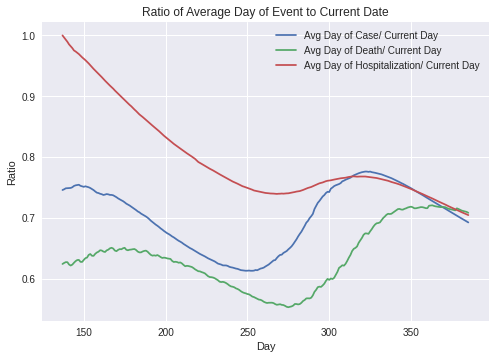

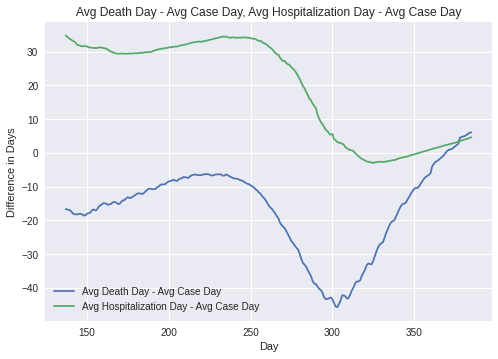

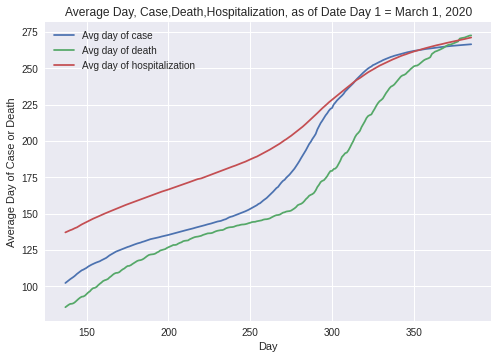

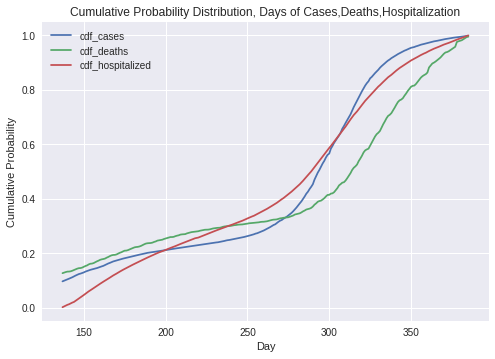

In [664]:
# ratio avg Day of Event/current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
# avg hospitalization day - avg case day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
# avg Day of Case/Death/Hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
# CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')

plt.style.use('seaborn')